# Comparativas de Precios

In [6]:
# Librerías de extracción de datos
# -----------------------------------------------------------------------
# (Aquí puedes añadir librerías para scraping si las necesitas, como BeautifulSoup o requests)

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd             # Para manipular estructuras de datos como DataFrames
import numpy as np              # Para cálculos numéricos y manejo de arrays

# Manejo del tiempo y generación de pausas
# -----------------------------------------------------------------------
from time import sleep          # Pausar la ejecución del código durante un tiempo definido
import random                   # Generar valores aleatorios, útil para espaciar solicitudes web y evitar bloqueos

# Importación de módulos desde rutas recursivas
# -----------------------------------------------------------------------
import sys
sys.path.append("../")  # Añadir rutas externas para poder importar módulos desde carpetas superiores
from src.SupportAlojamientos import obtain_html, make_df  # Funciones personalizadas de apoyo para scraping de alojamientos

# Manejo de advertencias
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')  # Ignorar advertencias para tener una salida limpia

# Librerías para visualización de datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt     # Para crear gráficos y visualizaciones básicas
import seaborn as sns               # Para visualizaciones estadísticas más avanzadas


In [8]:
actividades_monaco = pd.read_csv("../datos/actividades/actividades_mónaco.csv",index_col="Unnamed: 0")
actividades_oslo = pd.read_csv("../datos/actividades/actividades_oslo.csv",index_col="Unnamed: 0")

# Comparativa de las actividades

In [9]:
actividades_monaco.sample()

,Actividad,Calificación,URL
2,The Private Collection of Antique Cars of H.S....,4.5,https://www.tripadvisor.es//Attraction_Review-...


# 1. Distribución de calificaciones en cada ciudad

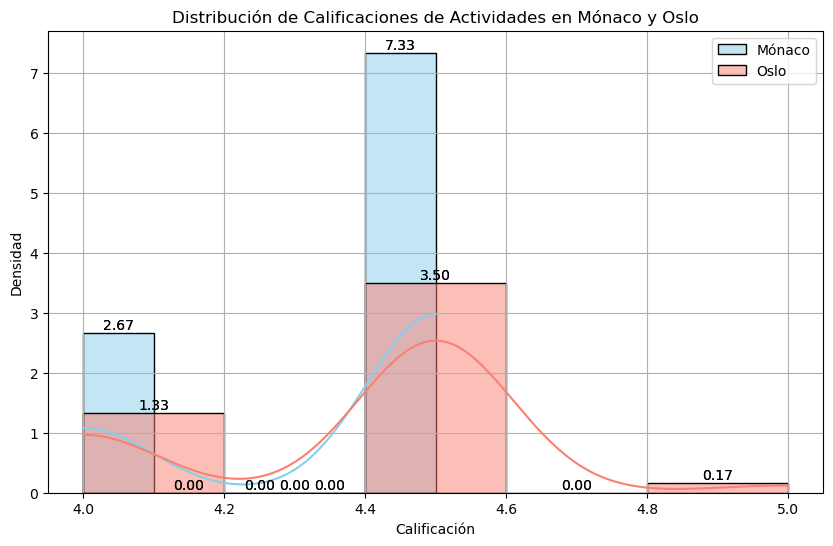

In [20]:
plt.figure(figsize=(10, 6))
monaco = sns.histplot(actividades_monaco['Calificación'], bins=5, kde=True, color="skyblue", label="Mónaco", stat="density")
oslo = sns.histplot(actividades_oslo['Calificación'], bins=5, kde=True, color="salmon", label="Oslo", stat="density")

# Añadir los números encima de cada barra para Mónaco
for p in monaco.patches:
    monaco.annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

# Añadir los números encima de cada barra para Oslo
for p in oslo.patches:
    oslo.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom')

plt.xlabel("Calificación")
plt.ylabel("Densidad")
plt.title("Distribución de Calificaciones de Actividades en Mónaco y Oslo")
plt.grid(visible=True)
plt.legend()
plt.show()


En la gráfica de distribución de calificaciones de actividades en Mónaco y Oslo, observamos una tendencia clara hacia calificaciones altas en ambos destinos. Aquí algunos puntos clave del análisis:

1. Concentración de Calificaciones:

- **La mayoría de las actividades** en ambas ciudades tienen calificaciones altas, situándose entre 4.0 y 4.5. Esto indica una oferta turística de calidad similar en ambos lugares, con actividades generalmente bien valoradas.
- **La densidad más alta** en cada destino está alrededor de la calificación de 4.5, lo que sugiere que los visitantes de ambos destinos suelen encontrar experiencias satisfactorias.

2. Comparación entre Mónaco y Oslo:

- Aunque ambas ciudades tienen una distribución de calificaciones similar, Mónaco muestra una leve mayor concentración en calificaciones justo por encima de 4.0, mientras que Oslo parece estar ligeramente más concentrado en 4.5.
- Esto puede indicar que las actividade de Oslo están ligeramente mejor valoradas en términos de experiencia general.

3. Rangos de Calificación Menores:

- Notamos muy pocas o ninguna actividad en rangos de calificación inferiores a 4.0, lo que sugiere que, en general, las opciones de actividades en ambas ciudades mantienen un estándar de calidad alto.
- Es poco común encontrar actividades turísticas en estos destinos con calificaciones bajas, lo cual es positivo para quienes buscan experiencias confiables y bien valoradas.

# 2. Actividades con mejor calificación en ambas ciudades

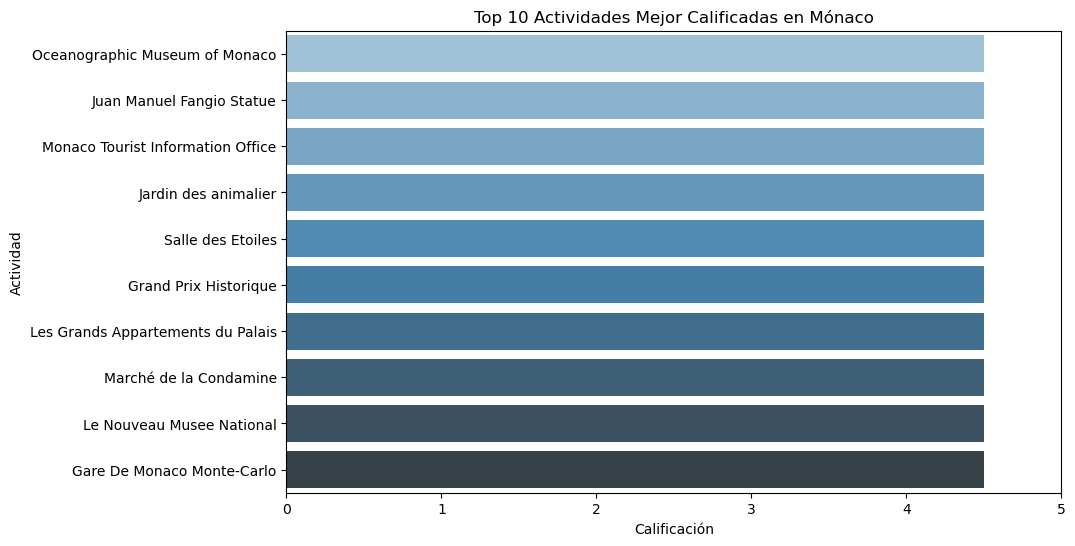

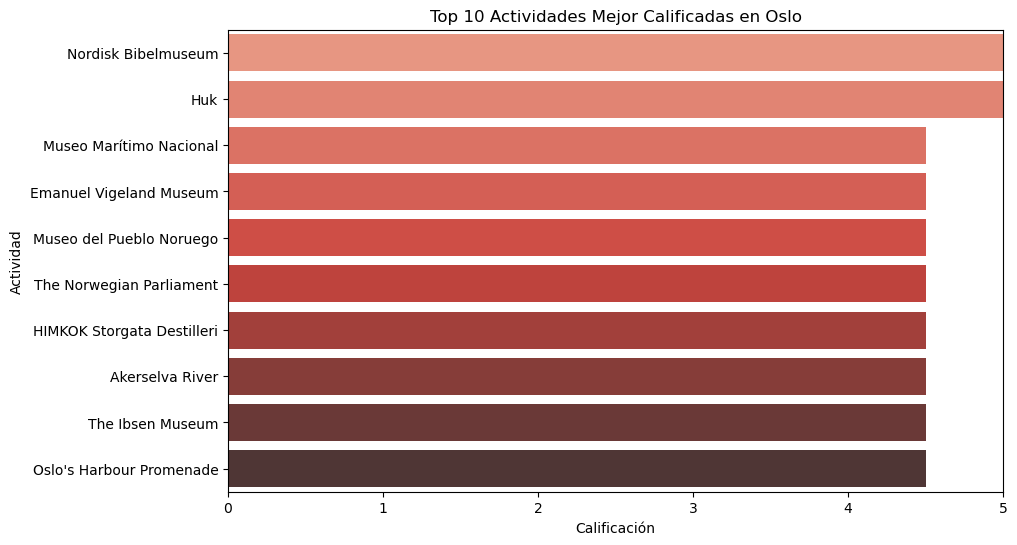

In [14]:
top_monaco = actividades_monaco.sort_values(by="Calificación", ascending=False).head(10)
top_oslo = actividades_oslo.sort_values(by="Calificación", ascending=False).head(10)

# Gráfico para Mónaco
plt.figure(figsize=(10, 6))
sns.barplot(y="Actividad", x="Calificación", data=top_monaco, palette="Blues_d")
plt.title("Top 10 Actividades Mejor Calificadas en Mónaco")
plt.xlabel("Calificación")
plt.ylabel("Actividad")
plt.xlim(0, 5)
plt.show()

# Gráfico para Oslo
plt.figure(figsize=(10, 6))
sns.barplot(y="Actividad", x="Calificación", data=top_oslo, palette="Reds_d")
plt.title("Top 10 Actividades Mejor Calificadas en Oslo")
plt.xlabel("Calificación")
plt.ylabel("Actividad")
plt.xlim(0, 5)
plt.show()

# 3. Calificación promedio entre Mónaco y Oslo

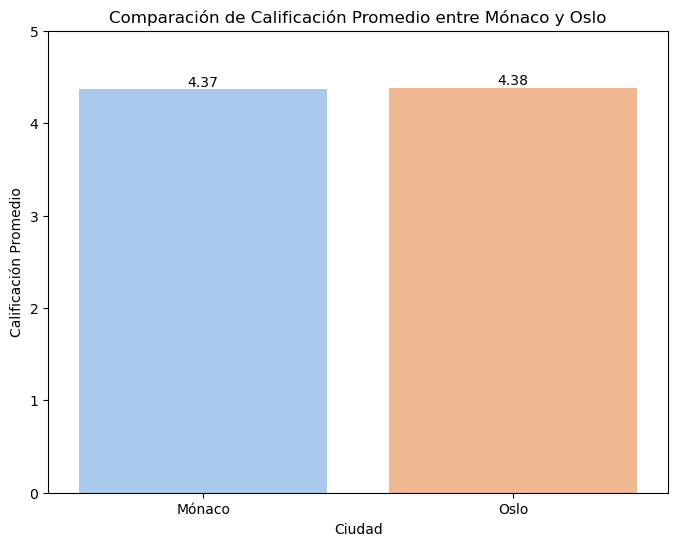

In [21]:
promedio_calificacion = pd.DataFrame({
    "Ciudad": ["Mónaco", "Oslo"],
    "Calificación Promedio": [actividades_monaco["Calificación"].mean(), actividades_oslo["Calificación"].mean()]
})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Ciudad", y="Calificación Promedio", data=promedio_calificacion, palette="pastel")
plt.title("Comparación de Calificación Promedio entre Mónaco y Oslo")
plt.ylim(0, 5)
plt.xlabel("Ciudad")
plt.ylabel("Calificación Promedio")

# Agregar los valores promedio encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


Puntos clave:
1. **Calificaciones Promedio Altas**
- Tanto Mónaco como Oslo presentan calificaciones promedio superiores a 4.0, lo cual refuerza la idea de que ambos destinos ofrecen actividades de calidad que satisfacen a sus visitantes.
2. **Diferencia en la Calificación Promedio**
- Aunque la diferencia entre ambas ciudades es leve, Oslo tiene una calificación promedio ligeramente superior a Mónaco. Lo que sugiere que las actividades en Oslo han recibido una valoración mejor de los visitantes. Lo que puede reflejar experiencias más atractivas o mejor valoradas en Oslo, aunque ambos destinos son muy parecidos en valoración.

# Comparativas Precios Alojamientos

In [12]:
alojamientos_monaco =  pd.read_csv("../datos/alojamientos/alojamientos_mónaco.csv",index_col="Unnamed: 0")
alojamientos_oslo = pd.read_csv("../datos/alojamientos/alojamientos_oslo.csv",index_col="Unnamed: 0")

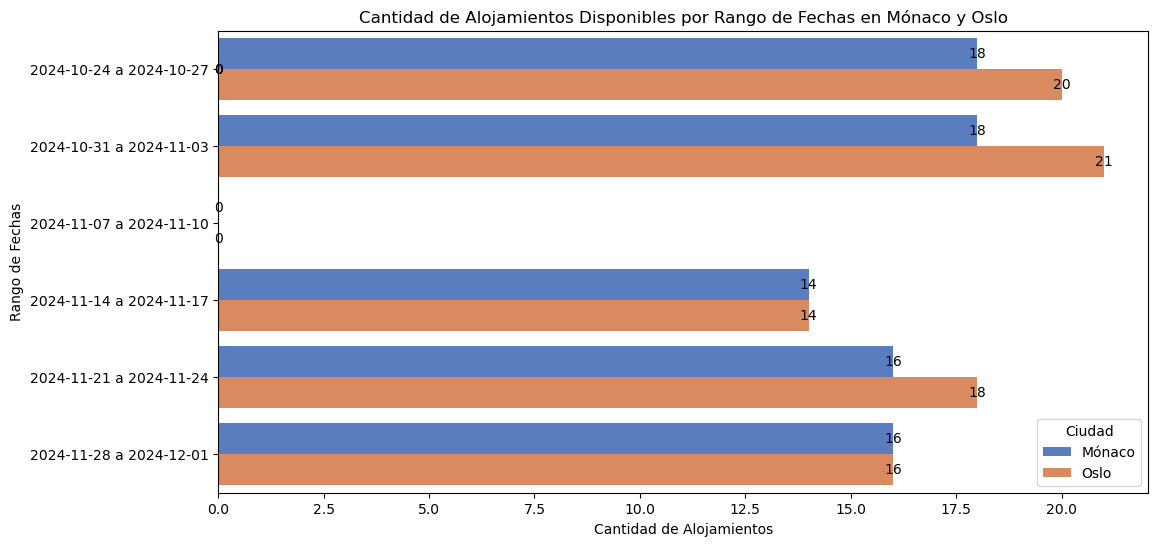

In [15]:
alojamientos_monaco["Ciudad"] = "Mónaco"
alojamientos_oslo["Ciudad"] = "Oslo"

alojamientos_monaco["Fecha entrada"] = pd.to_datetime(alojamientos_monaco["Fecha entrada"], errors='coerce')
alojamientos_monaco["Fecha salida"] = pd.to_datetime(alojamientos_monaco["Fecha salida"], errors='coerce')
alojamientos_oslo["Fecha entrada"] = pd.to_datetime(alojamientos_oslo["Fecha entrada"], errors='coerce')
alojamientos_oslo["Fecha salida"] = pd.to_datetime(alojamientos_oslo["Fecha salida"], errors='coerce')

alojamientos = pd.concat([alojamientos_monaco, alojamientos_oslo], ignore_index=True)

rango_fechas = [
    ('2024-10-24', '2024-10-27'),
    ('2024-10-31', '2024-11-03'),
    ('2024-11-07', '2024-11-10'),
    ('2024-11-14', '2024-11-17'),
    ('2024-11-21', '2024-11-24'),
    ('2024-11-28', '2024-12-01')]

conteos = []
for start, end in rango_fechas:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    
    count_monaco = alojamientos_monaco[(alojamientos_monaco['Fecha entrada'] >= start_date) & 
                                       (alojamientos_monaco['Fecha salida'] <= end_date)].shape[0]
    
    count_oslo = alojamientos_oslo[(alojamientos_oslo['Fecha entrada'] >= start_date) & 
                                   (alojamientos_oslo['Fecha salida'] <= end_date)].shape[0]
    
    conteos.append([f"{start} a {end}", "Mónaco", count_monaco])
    conteos.append([f"{start} a {end}", "Oslo", count_oslo])

disponibilidad_por_rango = pd.DataFrame(conteos, columns=["Rango", "Ciudad", "Cantidad"])


plt.figure(figsize=(12, 6))
ax = sns.barplot(data=disponibilidad_por_rango, y="Rango", x="Cantidad", hue="Ciudad", palette="muted")
plt.title("Cantidad de Alojamientos Disponibles por Rango de Fechas en Mónaco y Oslo")
plt.xlabel("Cantidad de Alojamientos")
plt.ylabel("Rango de Fechas")

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center')

plt.show()



La gráfica muestra cómo varía la disponibilidad de alojamientos entre ambos destinos en cada periodo específico.

1. **Comparación de Disponibilidad entre Mónaco y Oslo:**

- En la mayoría de los rangos de fechas, Oslo presenta una ligera ventaja en la cantidad de alojamientos disponibles en comparación con Mónaco. 
- Esto sugiere que Oslo podría tener una oferta de alojamiento ligeramente mayor, lo que puede ser atractivo para los viajeros que buscan más opciones en cuanto a precios o ubicación.

2. **Variabilidad entre Rangos de Fechas:**

- Notamos que la disponibilidad no es constante; algunos periodos, como el de 14 al 17 de noviembre, tienen una menor cantidad de alojamientos en ambas ciudades. 
- Esto podría indicar una baja en la oferta de alojamiento en ciertas fechas o una posible demanda anticipada en otras fechas.

3. **Patrones de Demanda Posible:**

- Las fechas hacia finales de octubre y principios de noviembre **(como el rango del 24 al 27 de octubre y del 31 de octubre al 3 de noviembre)** muestran mayor disponibilidad. 
- Este patrón podría estar asociado a una menor demanda estacional o a que estos periodos no coinciden con festividades importantes.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


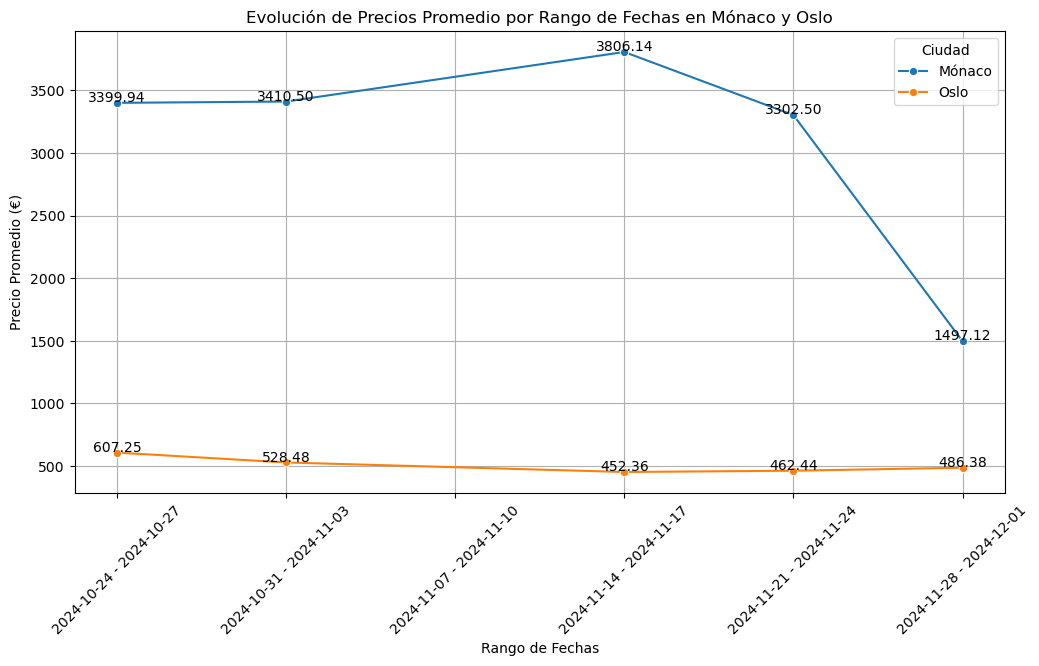

In [22]:
promedio_precio_conteo = []

for start, end in rango_fechas:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    
    avg_price_monaco = alojamientos_monaco[(alojamientos_monaco['Fecha entrada'] >= start_date) & 
                                           (alojamientos_monaco['Fecha salida'] <= end_date)]['Precio (€)'].mean()
    avg_price_oslo = alojamientos_oslo[(alojamientos_oslo['Fecha entrada'] >= start_date) & 
                                       (alojamientos_oslo['Fecha salida'] <= end_date)]['Precio (€)'].mean()
    
    promedio_precio_conteo.append([f"{start} - {end}", "Mónaco", avg_price_monaco])
    promedio_precio_conteo.append([f"{start} - {end}", "Oslo", avg_price_oslo])

promedio_por_rango = pd.DataFrame(promedio_precio_conteo, columns=["Rango", "Ciudad", "Precio (€)"])

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=promedio_por_rango, x="Rango", y="Precio (€)", hue="Ciudad", marker="o")
plt.title("Evolución de Precios Promedio por Rango de Fechas en Mónaco y Oslo")
plt.xlabel("Rango de Fechas")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)

for x, row in promedio_por_rango.iterrows():
    ax.text(x=row['Rango'], y=row['Precio (€)'] + 10, s=f'{row["Precio (€)"]:.2f}', ha='center')
plt.grid()
plt.show()


1. **Comparación de Precios Promedio:**
- En general, los precios promedio de alojamiento en Mónaco son significativamente más altos que en Oslo. Esto es consistente a lo largo de todos los rangos de fechas, con diferencias bastante notorias.

2. **Tendencias en Mónaco:**
- Los precios en Mónaco muestran variaciones, con un incremento que alcanza un pico en el rango del 7 al 10 de noviembre (3806.14 €).
- Posteriormente, los precios disminuyen, terminando en el rango del 28 de noviembre al 1 de diciembre con un promedio de 1497.12 €.
- Esto podría indicar una fluctuación estacional en la demanda de alojamiento o la disponibilidad de opciones de lujo durante ciertos periodos.

3. **Tendencias en Oslo:**
- Los precios promedio en Oslo se mantienen relativamente estables, sin grandes cambios entre los rangos de fechas. El precio promedio oscila entre 452.36 € y 607.25 €, lo que sugiere una estabilidad en la oferta y demanda de alojamiento en este destino, con opciones más accesibles que en Mónaco.

4. **Conclusión General:**
- Para los viajeros que buscan opciones de alojamiento económico, Oslo sería una mejor opción, especialmente en el contexto de estos rangos de fechas, dada su estabilidad en precios bajos.
- Por otro lado, Mónaco muestra una mayor variabilidad en precios, lo que podría interesar a los viajeros dispuestos a pagar más por experiencias exclusivas, aunque deben tener en cuenta los periodos en los que los precios son más altos.

# Comparativas Vuelos

In [23]:
vuelos_niza = pd.read_csv("../datos/vuelos/vuelos_niza.csv",index_col="Unnamed: 0")
vuelos_oslo = pd.read_csv("../datos/vuelos/vuelos_oslo.csv",index_col="Unnamed: 0")

In [31]:
vuelos = pd.concat([vuelos_niza, vuelos_oslo], ignore_index=True)

# Promedio de Precios por Aerolínea

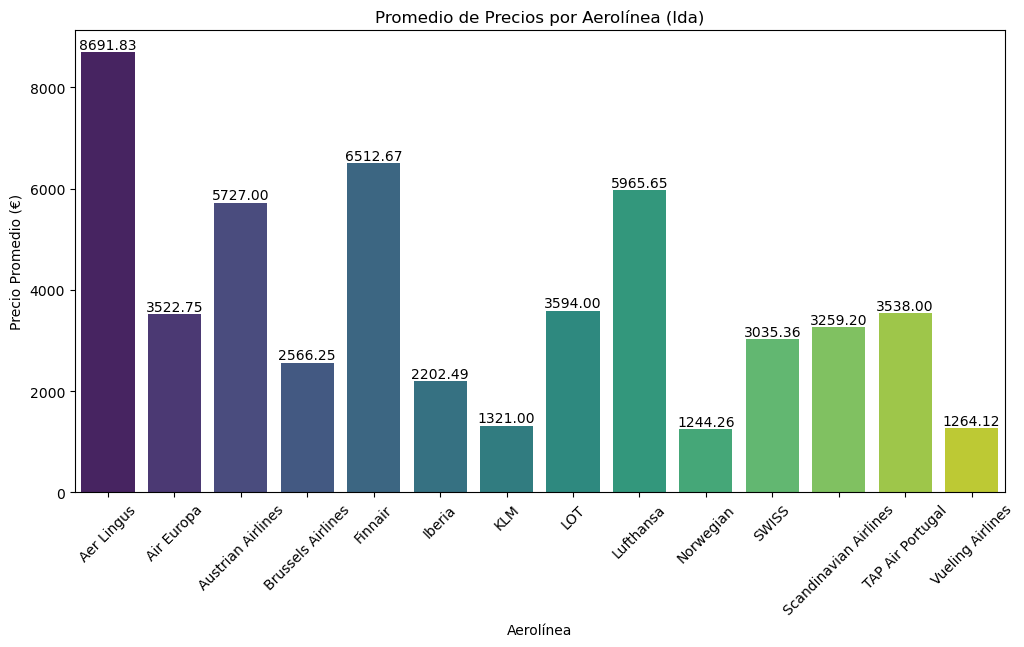

In [62]:
promedio_aerolinea = vuelos.groupby('aerolínea_ida')['precio (€)'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=promedio_aerolinea, x="aerolínea_ida", y="precio (€)", palette="viridis")
plt.title("Promedio de Precios por Aerolínea (Ida)")
plt.xlabel("Aerolínea")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()

# Comparación de Precios entre Niza y Oslo por Clase

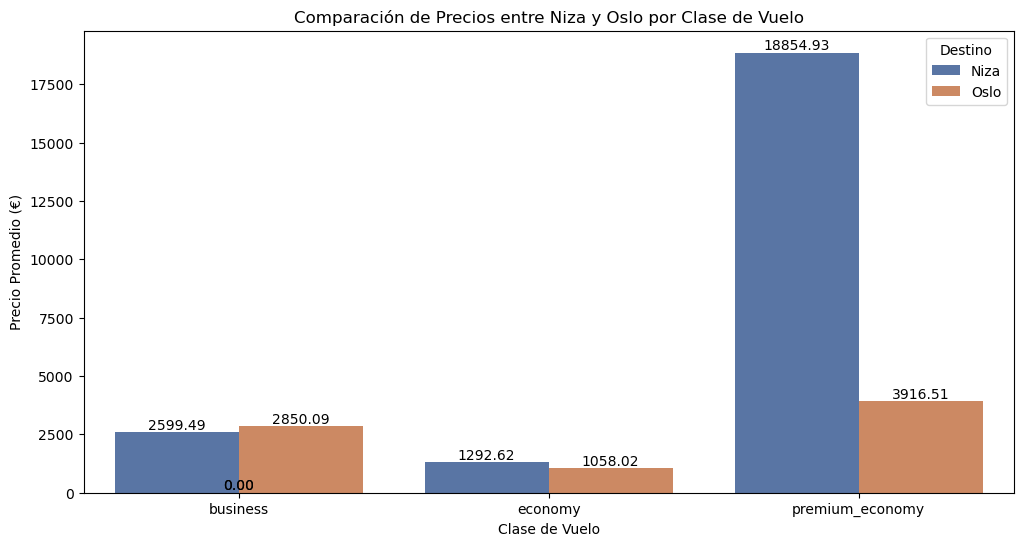

In [58]:
promedio_clase_destino = vuelos.groupby(['Destino', 'clase'])['precio (€)'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=promedio_clase_destino, x="clase", y="precio (€)", hue="Destino", palette="deep")
plt.title("Comparación de Precios entre Niza y Oslo por Clase de Vuelo")
plt.xlabel("Clase de Vuelo")
plt.ylabel("Precio Promedio (€)")

# Add annotations to show the price on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.legend(title="Destino")
plt.show()


# Duración Promedio del Vuelo por Aerolínea

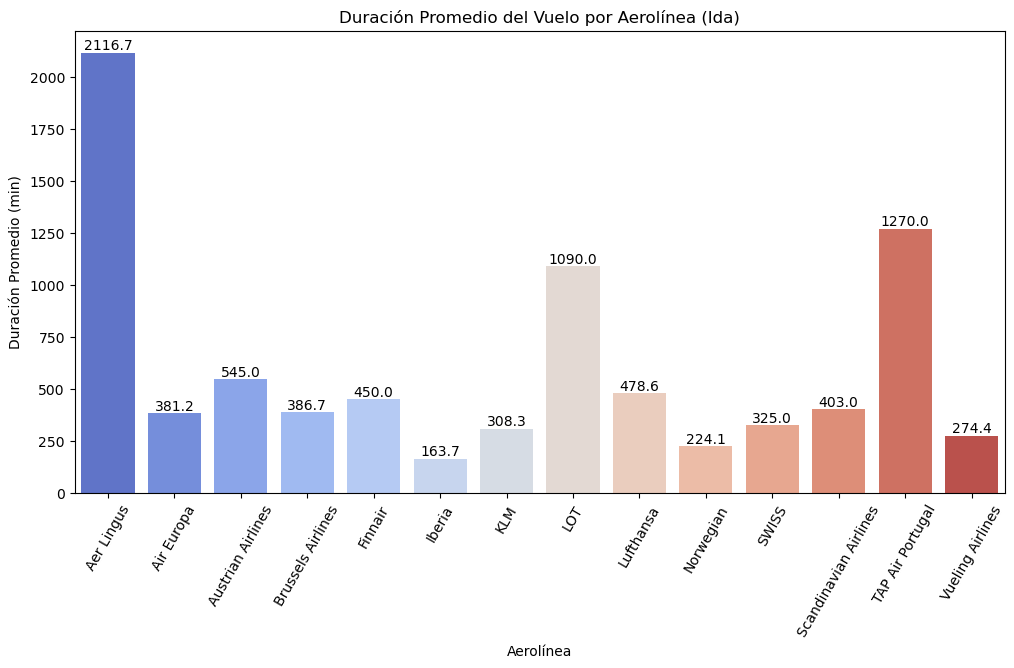

In [61]:
duracion_aerolinea = vuelos.groupby('aerolínea_ida')['duracion_ida (min)'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=duracion_aerolinea, x="aerolínea_ida", y="duracion_ida (min)", palette="coolwarm")
plt.title("Duración Promedio del Vuelo por Aerolínea (Ida)")
plt.xlabel("Aerolínea")
plt.ylabel("Duración Promedio (min)")
plt.xticks(rotation=60)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()

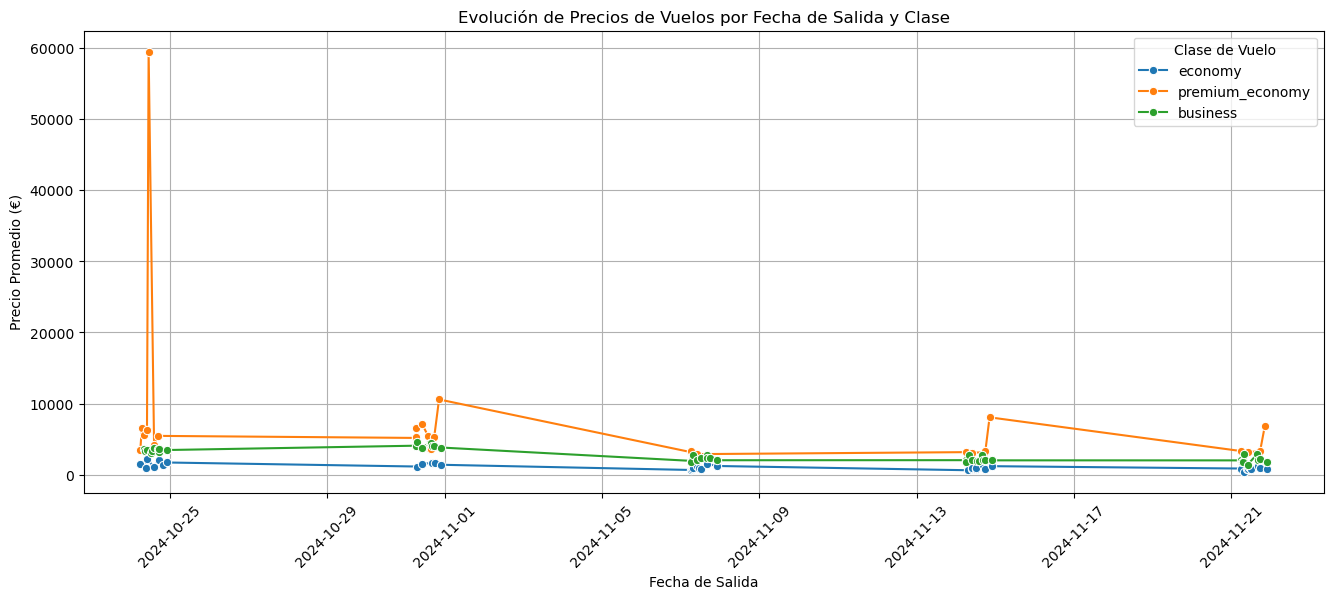

In [45]:
precios_fecha_salida_clase = vuelos.groupby(['fecha_salida_ida', 'clase'])['precio (€)'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=precios_fecha_salida_clase, x="fecha_salida_ida", y="precio (€)", hue="clase", marker="o")
plt.title("Evolución de Precios de Vuelos por Fecha de Salida y Clase")
plt.xlabel("Fecha de Salida")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)
plt.legend(title="Clase de Vuelo")
plt.grid(True)
plt.show()


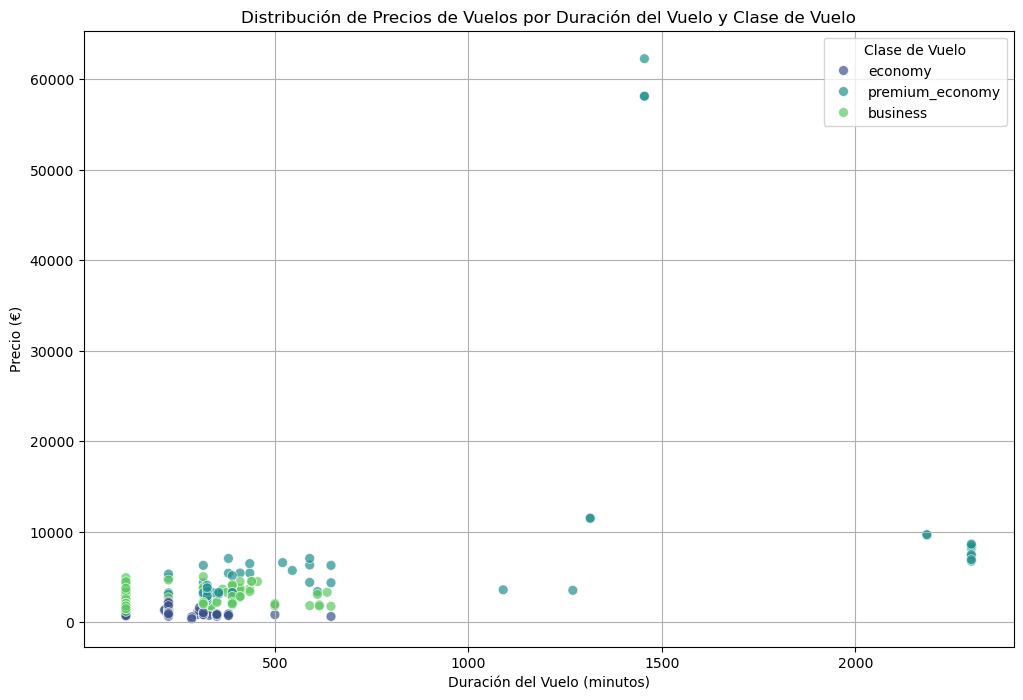

In [48]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=vuelos, x="duracion_ida (min)", y="precio (€)", hue="clase", palette="viridis", s=50, alpha=0.7)
plt.title("Distribución de Precios de Vuelos por Duración del Vuelo y Clase de Vuelo")
plt.xlabel("Duración del Vuelo (minutos)")
plt.ylabel("Precio (€)")
plt.legend(title="Clase de Vuelo")
plt.grid(True)
plt.show()


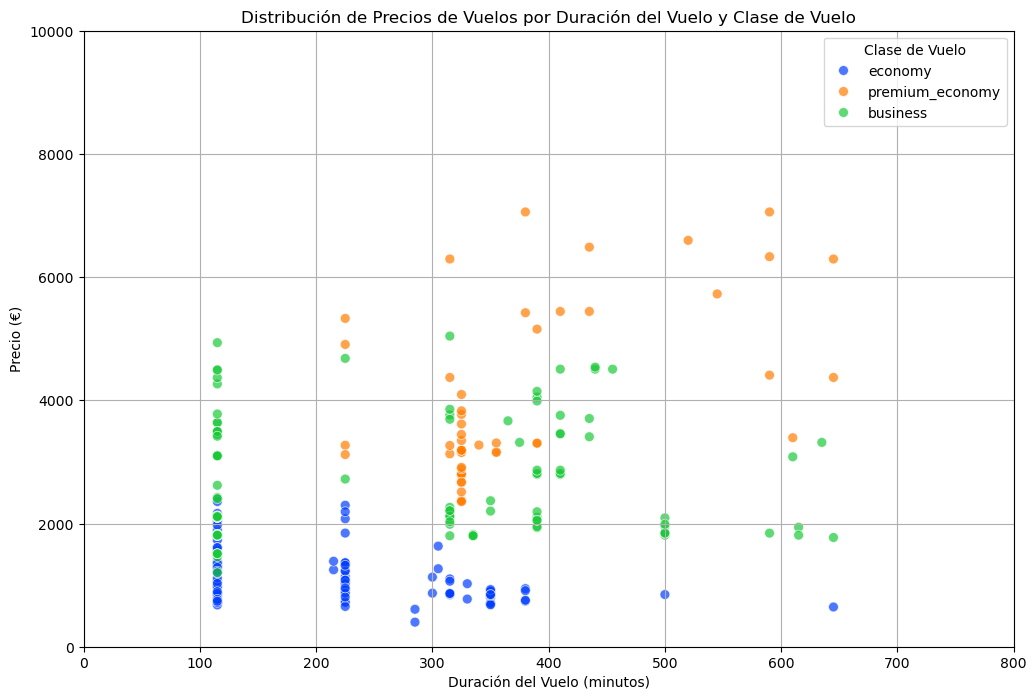

In [50]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=vuelos, x="duracion_ida (min)", y="precio (€)", hue="clase", palette="bright", s=50, alpha=0.7)
plt.title("Distribución de Precios de Vuelos por Duración del Vuelo y Clase de Vuelo")
plt.xlabel("Duración del Vuelo (minutos)")
plt.ylabel("Precio (€)")
plt.xlim(0, 800)
plt.ylim(0, 10000)
plt.legend(title="Clase de Vuelo")
plt.grid(True)
plt.show()


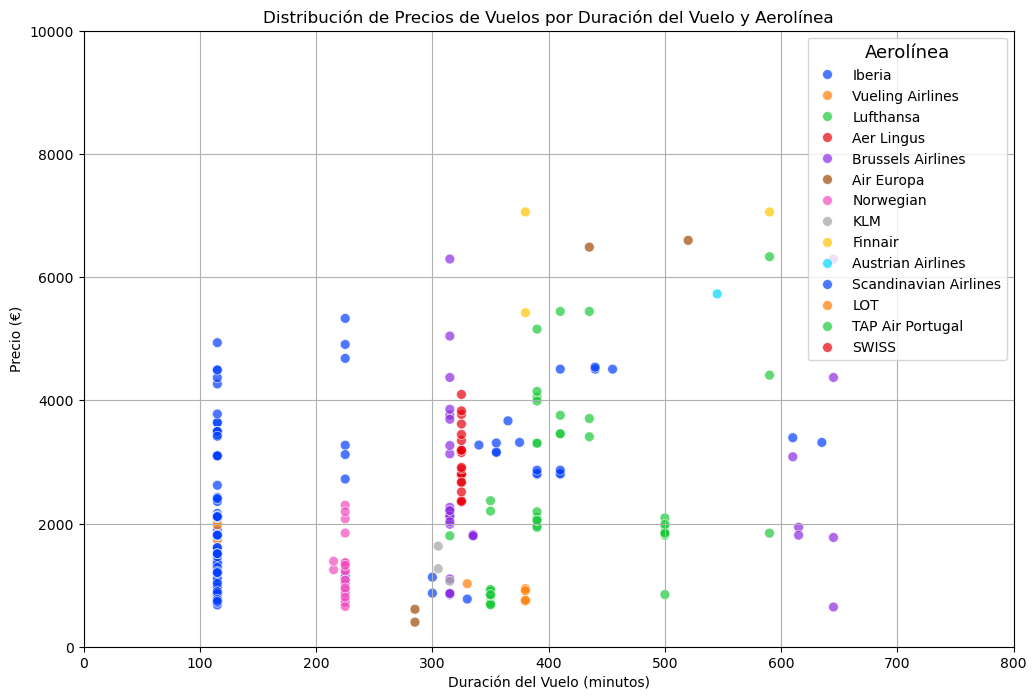

In [55]:
# Scatter plot with reduced legend size and grid enabled
plt.figure(figsize=(12, 8))
sns.scatterplot(data=vuelos, x="duracion_ida (min)", y="precio (€)", hue="aerolínea_ida", palette="bright", s=50, alpha=0.7)
plt.title("Distribución de Precios de Vuelos por Duración del Vuelo y Aerolínea")
plt.xlabel("Duración del Vuelo (minutos)")
plt.ylabel("Precio (€)")
plt.xlim(0, 800)
plt.ylim(0, 10000)
plt.legend(title="Aerolínea", title_fontsize='13', fontsize='10')  # Reduced legend font size
plt.grid(True)
plt.show()
